In [ ]:
""" This is my First Time in a while submitting something into kaggle, as it currently stands, this model isn't that great in the competition;
    regardless, this is good practice for me in using optuna, catboost. In the future I plan to use other machine learning models and improve
    my skills as a data analyst/ data scientist. I will provide some commentary below as to what I did 
    dataset can be found at https://www.kaggle.com/competitions/playground-series-s4e12"""

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import KFold
import optuna

df = pd.read_csv("train.csv")
df.head()

C:\ProgramData\anaconda3\envs\dataset_pytorch_based\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [ ]:
"""Below I just did some basic exploratory data analysis by looking at aspects such as the datatypes, the size, and the the data quality"""

In [3]:
print(df.dtypes)
print(df.shape)

id                        int64
Age                     float64
Gender                   object
Annual Income           float64
Marital Status           object
Number of Dependents    float64
Education Level          object
Occupation               object
Health Score            float64
Location                 object
Policy Type              object
Previous Claims         float64
Vehicle Age             float64
Credit Score            float64
Insurance Duration      float64
Policy Start Date        object
Customer Feedback        object
Smoking Status           object
Exercise Frequency       object
Property Type            object
Premium Amount          float64
dtype: object
(1200000, 21)


In [4]:
print(df.isnull().sum()/len(df) * 100)
print(df.duplicated().sum())

id                       0.000000
Age                      1.558750
Gender                   0.000000
Annual Income            3.745750
Marital Status           1.544083
Number of Dependents     9.139333
Education Level          0.000000
Occupation              29.839583
Health Score             6.173000
Location                 0.000000
Policy Type              0.000000
Previous Claims         30.335750
Vehicle Age              0.000500
Credit Score            11.490167
Insurance Duration       0.000083
Policy Start Date        0.000000
Customer Feedback        6.485333
Smoking Status           0.000000
Exercise Frequency       0.000000
Property Type            0.000000
Premium Amount           0.000000
dtype: float64
0


In [26]:
for i in df.columns:
    if  i == "Policy Start Date" or i == "id":
        continue
    print(i + " Unique Values: " + str(df[i].nunique()))

id Unique Values: 1200000
Age Unique Values: 47
Gender Unique Values: 2
Annual Income Unique Values: 88593
Marital Status Unique Values: 3
Number of Dependents Unique Values: 5
Education Level Unique Values: 4
Occupation Unique Values: 3
Health Score Unique Values: 532657
Location Unique Values: 3
Policy Type Unique Values: 3
Previous Claims Unique Values: 10
Vehicle Age Unique Values: 20
Credit Score Unique Values: 550
Insurance Duration Unique Values: 9
Customer Feedback Unique Values: 3
Smoking Status Unique Values: 2
Exercise Frequency Unique Values: 4
Property Type Unique Values: 3
Premium Amount Unique Values: 4794


In [28]:
for i in df.columns:
    if i == "id" or i == "Annual Income" or i == "Health Score" or i == "Credit Score" or i == "Premium Amount" or i == "Policy Start Date":
        continue
    print(df[i].value_counts())
    print("")


Age
53.0    26354
61.0    26218
39.0    26042
64.0    25990
57.0    25971
43.0    25966
62.0    25849
46.0    25756
33.0    25728
47.0    25709
44.0    25642
34.0    25615
58.0    25544
31.0    25500
56.0    25450
32.0    25435
54.0    25370
38.0    25346
36.0    25340
35.0    25323
22.0    25309
59.0    25173
37.0    25163
51.0    25162
55.0    25132
49.0    25107
45.0    25101
20.0    25055
21.0    24987
50.0    24943
40.0    24877
48.0    24834
26.0    24805
24.0    24690
30.0    24683
29.0    24673
19.0    24641
42.0    24626
60.0    24593
52.0    24592
18.0    24488
28.0    24455
63.0    24283
25.0    24221
27.0    24212
41.0    24117
23.0    23225
Name: count, dtype: int64

Gender
Male      602571
Female    597429
Name: count, dtype: int64

Marital Status
Single      395391
Married     394316
Divorced    391764
Name: count, dtype: int64

Number of Dependents
3.0    221475
4.0    220340
0.0    218124
2.0    215313
1.0    215076
Name: count, dtype: int64

Education Level
Master's  

In [ ]:
""" Here I just Simply decided to impute the values with either the mean or the median, one thing I could've done was
    to create a indicator variable for data with high amounts of missing data """

In [3]:
df["Credit Score"] = df["Credit Score"].fillna(np.median(df["Credit Score"].dropna()))
df["Occupation"] = df["Occupation"].fillna("Unemployed")
df["Previous Claims"] = df["Previous Claims"].fillna(0)
df["Number of Dependents"] = df["Number of Dependents"].fillna(0)
df["Marital Status"] = df["Marital Status"].fillna(df["Marital Status"].mode()[0])
df["Customer Feedback"] = df["Customer Feedback"].fillna(df["Customer Feedback"].mode()[0])
df["Health Score"] = df["Health Score"].fillna(np.mean(df["Health Score"].dropna()))
df["Policy Start Date"] = pd.to_datetime(df["Policy Start Date"])


In [ ]:
"""Below are Some graphs of the numeric datatypes where I wanted to see the distribution and how it correlates with the Premium Amount """

C:\ProgramData\anaconda3\envs\dataset_pytorch_based\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


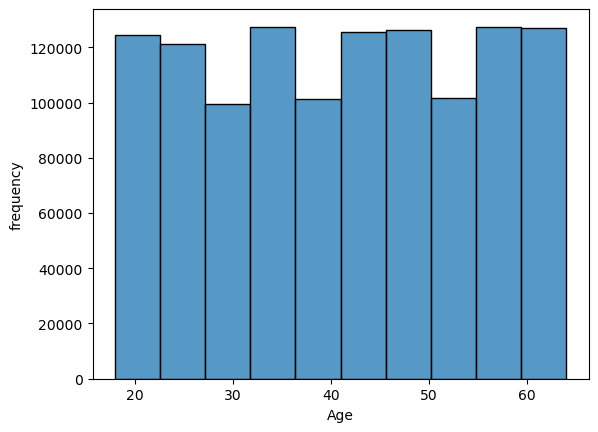

C:\ProgramData\anaconda3\envs\dataset_pytorch_based\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


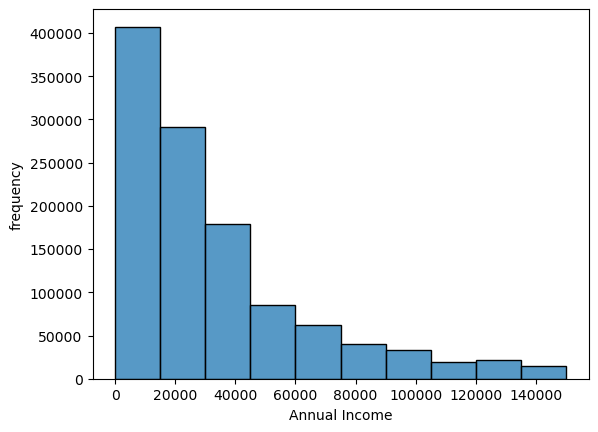

C:\ProgramData\anaconda3\envs\dataset_pytorch_based\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


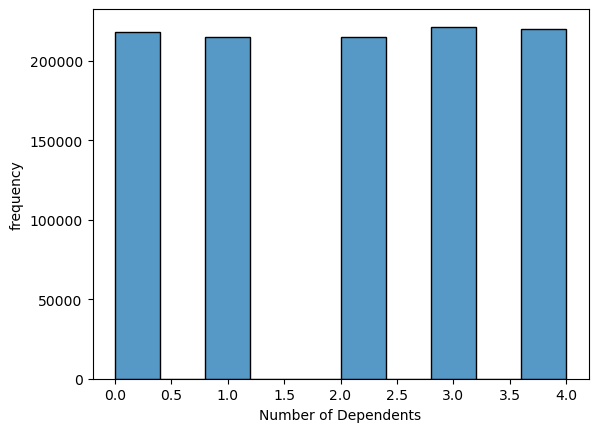

C:\ProgramData\anaconda3\envs\dataset_pytorch_based\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


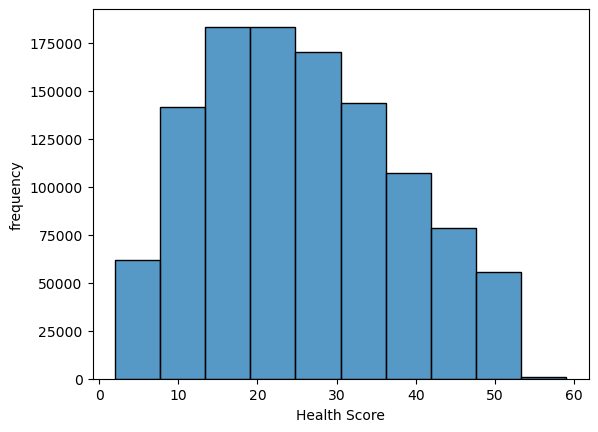

C:\ProgramData\anaconda3\envs\dataset_pytorch_based\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


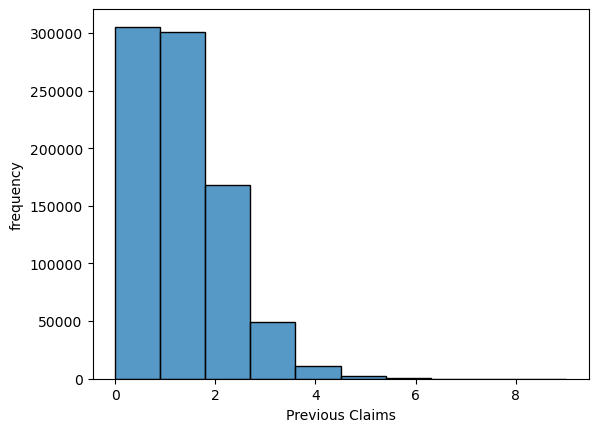

C:\ProgramData\anaconda3\envs\dataset_pytorch_based\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


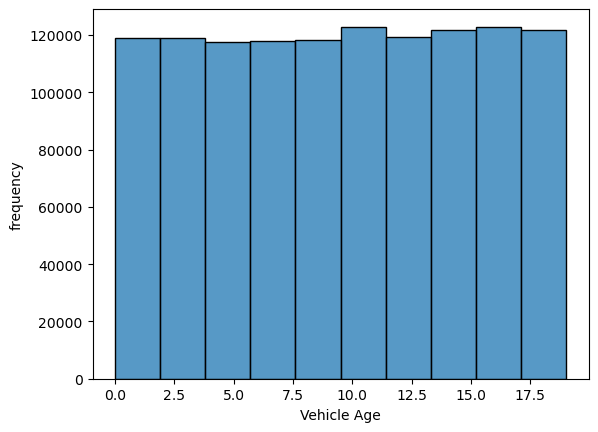

C:\ProgramData\anaconda3\envs\dataset_pytorch_based\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


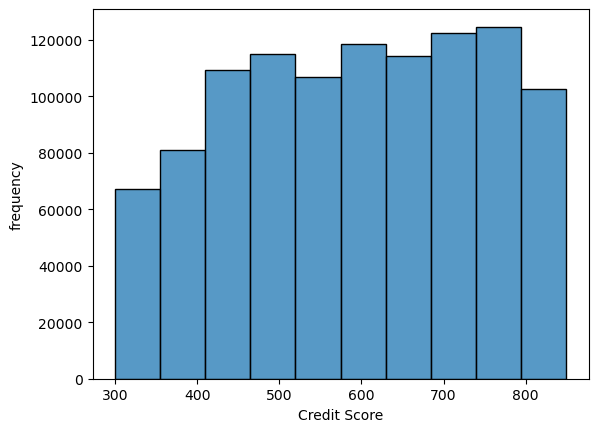

C:\ProgramData\anaconda3\envs\dataset_pytorch_based\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


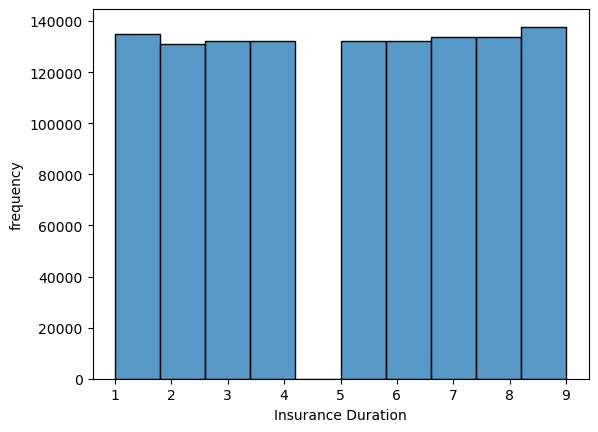

In [18]:
variables = [variable for variable in df.columns.tolist() if variable not in ["id","Premium Amount"]]

for i in variables:
    if not (df[i].dtype.name == "float64"): 
        continue
    sns.histplot(df[i], bins = 10)
    #plt.scatter(df[i], df["Target"])
    plt.xlabel(i)
    plt.ylabel("frequency")
    plt.show()


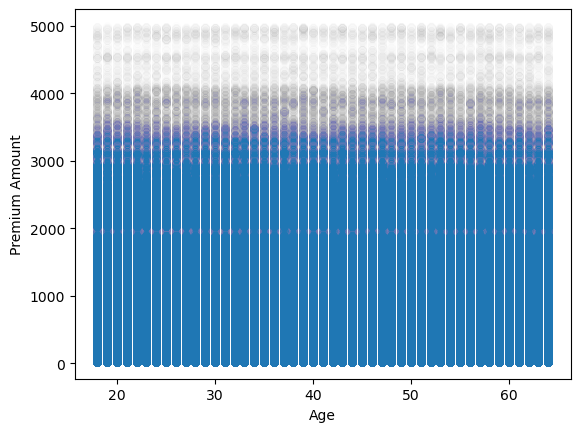

-0.0024301791772832365



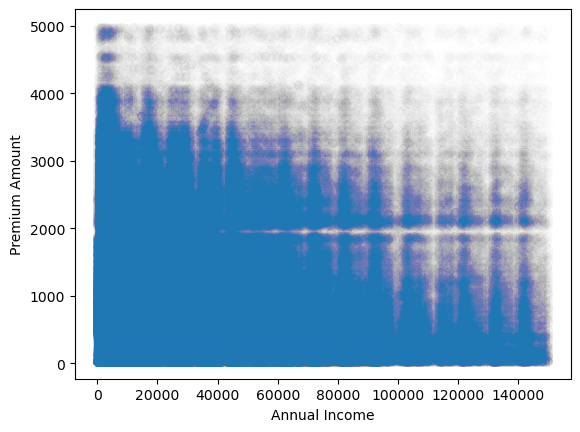

-0.012389791502733756



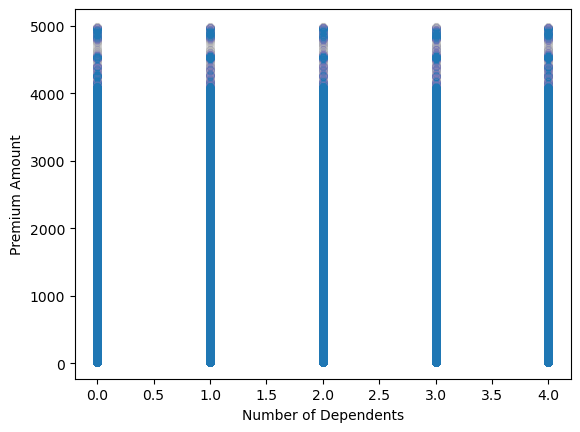

-0.0009763041727847379



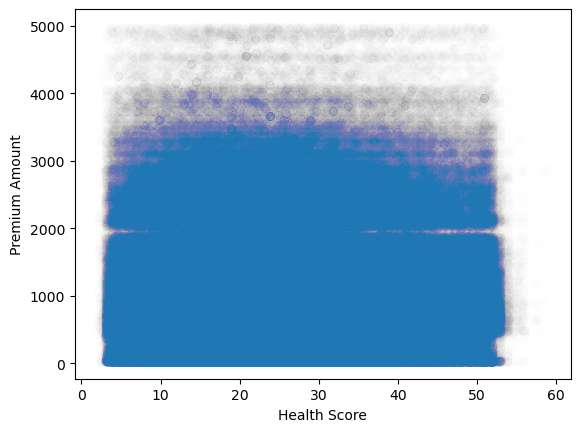

0.01470449183979657



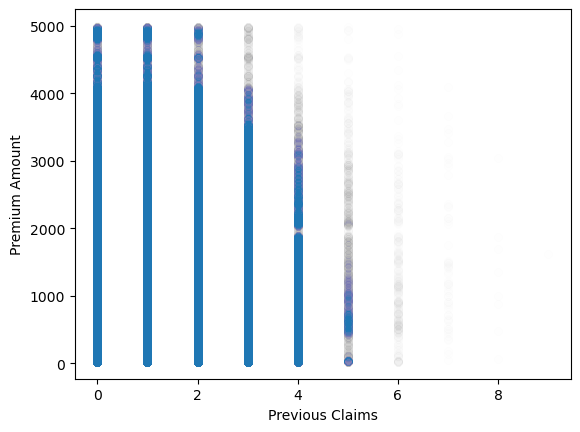

0.04687383081564696



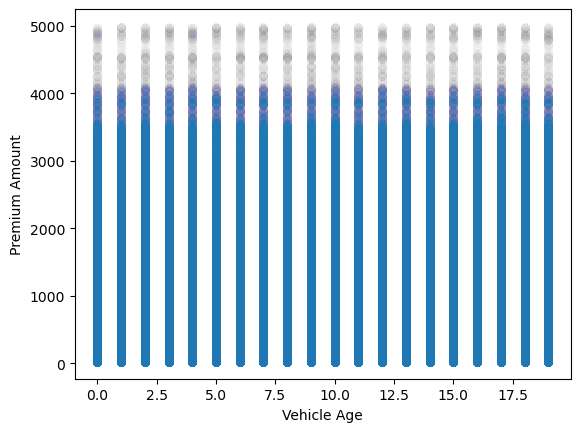

0.0003909549359081644



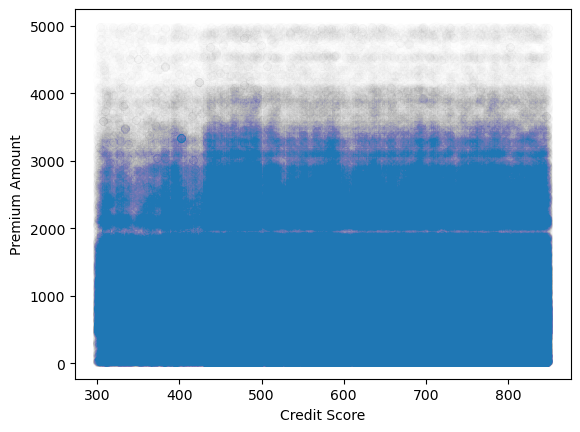

-0.02601371281698154



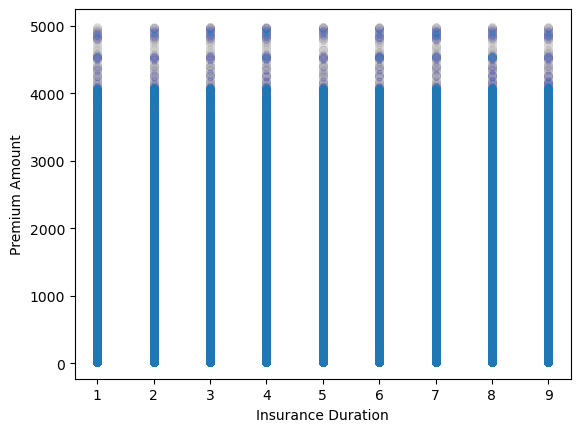

-2.8189776366862753e-05



In [30]:
variables = [variable for variable in df.columns.tolist() if variable not in ["id","Premium Amount"]]

for i in variables:
    if not (df[i].dtype.name == "float64"): 
        continue
    plt.scatter(df[i], df["Premium Amount"], alpha=0.005)
    plt.xlabel(i)
    plt.ylabel("Premium Amount")
    plt.show()
    print(df["Premium Amount"].corr(df[i]))
    print("")

In [13]:
for i in df.columns.tolist():
    if not (df[i].dtype.name == "float64" or i = "Premium Amount"): 
        continue
    print(i, df["Premium Amount"].corr(df[i]))


Age -0.0024301791772832365
Annual Income -0.012389791502733756
Number of Dependents -0.004305659848837894
Health Score 0.014325977293954172
Previous Claims 0.043884660601538776
Vehicle Age 0.0003909549359081644
Credit Score -0.024471215832838882
Insurance Duration -2.8189776366862753e-05
Premium Amount 1.0


In [ ]:
"""Here is where I created my model using Catboost"""

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['id', 'Premium Amount']), df["Premium Amount"], test_size=0.2, random_state = 42 )

In [10]:
categorical_indices = [X_train.columns.get_loc(col) for col in X_train.select_dtypes(include=['object']).columns]

In [11]:
def catObjective(trial):
    iterations = trial.suggest_int('iterations', 100,1000)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.1, log = True)
    depth = trial.suggest_int('depth', 3 ,8)
    border_count = trial.suggest_int("border_count", 32, 128)
    l2_leaf_reg = trial.suggest_float("l2_leaf_reg", 0.1, 5, log = True)

    model = CatBoostRegressor(iterations = iterations, learning_rate = learning_rate, 
                               depth = depth, border_count = border_count, l2_leaf_reg = l2_leaf_reg, 
                               verbose = 0, cat_features = categorical_indices)
    score = sum(cross_val_score(model, X_train, y_train, cv = 4, scoring='neg_root_mean_squared_error', n_jobs = -1))/5
                               
    return score                     
    

In [12]:
studyCat = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler(seed=42))

[I 2024-12-31 02:13:21,932] A new study created in memory with name: no-name-14b73a54-9016-4a64-9186-4f6b0c640823


In [13]:
studyCat.optimize(catObjective, n_trials = 75)

[I 2024-12-31 02:20:03,401] Trial 0 finished with value: -674.9798836600087 and parameters: {'iterations': 437, 'learning_rate': 0.08927180304353628, 'depth': 7, 'border_count': 90, 'l2_leaf_reg': 0.18410729205738682}. Best is trial 0 with value: -674.9798836600087.
[I 2024-12-31 02:24:16,506] Trial 1 finished with value: -677.7546994129046 and parameters: {'iterations': 240, 'learning_rate': 0.011430983876313222, 'depth': 8, 'border_count': 90, 'l2_leaf_reg': 1.5958573588141267}. Best is trial 0 with value: -674.9798836600087.
[I 2024-12-31 02:24:56,890] Trial 2 finished with value: -676.5874431590757 and parameters: {'iterations': 118, 'learning_rate': 0.09330606024425668, 'depth': 7, 'border_count': 52, 'l2_leaf_reg': 0.20366442026830908}. Best is trial 0 with value: -674.9798836600087.
[I 2024-12-31 02:28:18,029] Trial 3 finished with value: -678.7163328258273 and parameters: {'iterations': 265, 'learning_rate': 0.02014847788415866, 'depth': 6, 'border_count': 73, 'l2_leaf_reg': 0.

In [16]:
X_train.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
404339,45.0,Male,91315.0,Divorced,3.0,Bachelor's,Unemployed,43.926883,Urban,Comprehensive,0.0,1.0,311.0,2.0,2024-08-11 15:21:39.134960,Poor,No,Rarely,House
748487,51.0,Female,5280.0,Married,1.0,PhD,Unemployed,41.854227,Rural,Basic,0.0,1.0,634.0,8.0,2020-06-20 15:21:39.098696,Poor,Yes,Monthly,Condo
435951,48.0,Female,41318.0,Divorced,0.0,Master's,Unemployed,51.750192,Urban,Comprehensive,1.0,12.0,759.0,9.0,2021-02-05 15:21:39.134960,Poor,Yes,Rarely,Condo
311284,43.0,Female,30372.0,Divorced,0.0,PhD,Unemployed,20.666786,Urban,Comprehensive,2.0,8.0,460.0,1.0,2022-11-11 15:21:39.093681,Average,No,Monthly,Condo
318790,18.0,Male,12891.0,Married,0.0,Bachelor's,Unemployed,36.995102,Urban,Basic,0.0,18.0,831.0,3.0,2021-01-01 15:21:39.095696,Poor,Yes,Monthly,Apartment


In [14]:
studyCat.best_params

{'iterations': 829,
 'learning_rate': 0.06458228319438214,
 'depth': 8,
 'border_count': 120,
 'l2_leaf_reg': 0.7391888334744298}

In [18]:
best_iterations = studyCat.best_params['iterations']
best_learning_rate = studyCat.best_params['learning_rate']
best_depth = studyCat.best_params['depth']
best_border_count = studyCat.best_params['border_count']
best_l2_leaf_reg = studyCat.best_params['l2_leaf_reg']

In [19]:
bestCatModel = CatBoostRegressor(iterations = best_iterations, learning_rate = best_learning_rate, 
                               depth = best_depth, border_count = best_border_count, l2_leaf_reg = best_l2_leaf_reg, 
                               verbose = 0, cat_features = categorical_indices)

In [20]:
bestCatModel.fit(X_train,y_train, verbose = 0)

In [23]:
y_pred = bestCatModel.predict(X_test)

In [24]:
rmsle = np.sqrt(np.mean((np.log1p(y_test) - np.log1p(y_pred)) ** 2))

In [25]:
rmsle

1.1425411950129625

In [ ]:
"""Preparing for Submission below"""

In [26]:
dfTest = pd.read_csv("test.csv")
dfTest.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House


In [27]:
dfTest["Credit Score"] = dfTest["Credit Score"].fillna(np.median(dfTest["Credit Score"].dropna()))
dfTest["Occupation"] = dfTest["Occupation"].fillna("Unemployed")
dfTest["Previous Claims"] = dfTest["Previous Claims"].fillna(0)
dfTest["Number of Dependents"] = dfTest["Number of Dependents"].fillna(0)
dfTest["Marital Status"] = dfTest["Marital Status"].fillna(dfTest["Marital Status"].mode()[0])
dfTest["Customer Feedback"] = dfTest["Customer Feedback"].fillna(dfTest["Customer Feedback"].mode()[0])
dfTest["Health Score"] = dfTest["Health Score"].fillna(np.mean(dfTest["Health Score"].dropna()))
dfTest["Policy Start Date"] = pd.to_datetime(dfTest["Policy Start Date"])


In [30]:
y_test_pred = pd.DataFrame({'Premium Amount': bestCatModel.predict(dfTest.drop(columns = ['id']))})

In [32]:
y_test_pred["id"] = dfTest['id']

In [35]:
y_test_pred = y_test_pred[['id', 'Premium Amount']]

In [39]:
y_test_pred.to_csv("submission.csv", index = False)
